##ГЛУБИННОЕ ОБУЧЕНИЕ НЕЙРОННЫХ СЕТЕЙ
##ЛАБОРАТОРНАЯ РАБОТА №1
М21-181-1 Перевощикова Дина Александровна

Основы работы с фреймворками TensorFlow/Keras

Цель работы – научиться реализовывать нейронные сети во фреймворке
TensorFlow/Keras для решения задач классификации данных и распознавания
изображений с использованием предобученных нейронных сетей из
стандартного набора данных.

Задачи:
1. Научиться устанавливать фреймворк TensorFlow/Keras и изучить
возможности реализации нейронных сетей для классификации данных.
2. Получить навыки создания нейронных сетей глубокого обучения для
распознавания изображений из стандартных наборов данных.
3. Исследовать обобщающую способность нейронных сетей в зависимости от
числа итераций обучения.

## Загрузка и предобработка статистических данных в TensorFlow/Keras
Для примера используем набор данных iris.csv. Для работы с набором данных добавим некоторые библиотеки.

In [1]:
import functools
import numpy as np
import tensorflow as tf
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler

Разделим выборку iris.csv на тренировочную и тестовую

In [2]:
data = pd.read_csv('/content/Iris.csv', sep = ',')
seed = 42
np.random.seed(seed)
Y = data['Species']
X = data.drop(['Id', 'Species'], axis=1)
print("Shape of Input  features: {}".format(X.shape))
print("Shape of Output features: {}".format(Y.shape))
Y.value_counts()
lbl_clf = LabelEncoder()
Y_encoded = lbl_clf.fit_transform(Y)

#Keras requires your output feature to be one-hot encoded values.
Y_final = tf.keras.utils.to_categorical(Y_encoded)

print("Therefore, our final shape of output feature will be {}".format(Y_final.shape))
x_train, x_test, y_train, y_test = train_test_split(X, Y_final, test_size=0.25, random_state=seed, stratify=Y_encoded, shuffle=True)

Shape of Input  features: (150, 4)
Shape of Output features: (150,)
Therefore, our final shape of output feature will be (150, 3)


In [11]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
std_clf = StandardScaler()
x_train_new = std_clf.fit_transform(x_train)
x_test_new = std_clf.transform(x_test)

In [4]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(10, input_dim=4, activation=tf.nn.relu, kernel_initializer='he_normal', 
                                kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(7, activation=tf.nn.relu, kernel_initializer='he_normal', 
                                kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.001, l2=0.001)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(5, activation=tf.nn.relu, kernel_initializer='he_normal', 
                                kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.001, l2=0.001)))
model.add(tf.keras.layers.Dense(3, activation=tf.nn.softmax))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

iris_model = model.fit(x_train_new, y_train, epochs=700, batch_size=7)

Epoch 1/700
16/16 [==============================] - 6s 12ms/step - loss: 1.3999 - accuracy: 0.2679
Epoch 2/700
16/16 [==============================] - 0s 9ms/step - loss: 1.4859 - accuracy: 0.2411
Epoch 3/700
16/16 [==============================] - 0s 8ms/step - loss: 1.3508 - accuracy: 0.3036
Epoch 4/700
16/16 [==============================] - 0s 6ms/step - loss: 1.3213 - accuracy: 0.3929
Epoch 5/700
16/16 [==============================] - 0s 16ms/step - loss: 1.3126 - accuracy: 0.3750
Epoch 6/700
16/16 [==============================] - 0s 10ms/step - loss: 1.2691 - accuracy: 0.4107
Epoch 7/700
16/16 [==============================] - 0s 11ms/step - loss: 1.2706 - accuracy: 0.4464
Epoch 8/700
16/16 [==============================] - 0s 9ms/step - loss: 1.2177 - accuracy: 0.4643
Epoch 9/700
16/16 [==============================] - 0s 8ms/step - loss: 1.2083 - accuracy: 0.5357
Epoch 10/700
16/16 [==============================] - 0s 10ms/step - loss: 1.2261 - accuracy: 0.4911
Epoc

In [5]:
model.evaluate(x_test_new, y_test)

2/2 [==============================] - 0s 8ms/step - loss: 0.1187 - accuracy: 0.9474


[0.11871310323476791, 0.9473684430122375]

## Загрузка изображений в TensorFlow/Keras
Первоначально загрузим библиотеки для создания сверточной нейронной сети CNN

In [6]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import keras

Для примера загрузим набор изображений cifar10 из библиотеки keras.

In [14]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()
assert train_images.shape == (50000, 32, 32, 3)
assert test_images.shape == (10000, 32, 32, 3)
assert train_labels.shape == (50000, 1)
assert test_labels.shape == (10000, 1)

Отобразим на экране некоторые изображения.

Создадим сверточную нейронную сеть с 3 сверточными слоями. Последний слой будет состоять из 10 выходов соответствующих классам.

In [8]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32,
32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

Скомпилируем сверточную нейронную сеть и определим весовые коэффициенты по данным обучающей группы:

In [9]:
model.compile(optimizer='adam',
 loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
 metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=15,
 validation_data=(test_images, test_labels))

Epoch 1/15
1563/1563 [==============================] - 88s 56ms/step - loss: 1.7439 - accuracy: 0.3907 - val_loss: 1.3959 - val_accuracy: 0.4927
Epoch 2/15
1563/1563 [==============================] - 81s 52ms/step - loss: 1.3375 - accuracy: 0.5242 - val_loss: 1.2546 - val_accuracy: 0.5574
Epoch 3/15
1563/1563 [==============================] - 107s 69ms/step - loss: 1.1737 - accuracy: 0.5880 - val_loss: 1.2058 - val_accuracy: 0.5773
Epoch 4/15
1563/1563 [==============================] - 98s 63ms/step - loss: 1.0731 - accuracy: 0.6267 - val_loss: 1.1092 - val_accuracy: 0.6165
Epoch 5/15
1563/1563 [==============================] - 87s 56ms/step - loss: 0.9788 - accuracy: 0.6582 - val_loss: 1.0553 - val_accuracy: 0.6399
Epoch 6/15
1563/1563 [==============================] - 94s 60ms/step - loss: 0.9093 - accuracy: 0.6833 - val_loss: 1.0728 - val_accuracy: 0.6455
Epoch 7/15
1563/1563 [==============================] - 94s 60ms/step - loss: 0.8503 - accuracy: 0.7063 - val_loss: 1.1185 

По окончании обучения нейронной сети выведем результаты оценки точности модели на тестововм наборе данных.

313/313 - 5s - loss: 1.1343 - accuracy: 0.6712 - 5s/epoch - 16ms/step


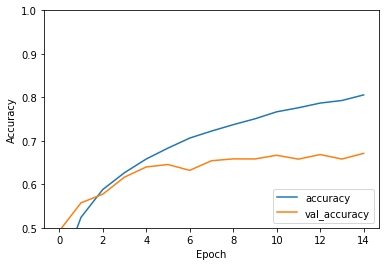

In [10]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

Как видно по результатам анализа глубокого обучения нейронной сети точность на обучающей группе составила 80%, а на тестовой не больше 70%